<a href="https://colab.research.google.com/github/arfadhiq/Census-Income/blob/main/Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and dependencies**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [70]:
from sklearn.model_selection import train_test_split

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
adult

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

In [5]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
adult.data

{'ids': None,
 'features':        age         workclass  fnlwgt  education  education-num  \
 0       39         State-gov   77516  Bachelors             13   
 1       50  Self-emp-not-inc   83311  Bachelors             13   
 2       38           Private  215646    HS-grad              9   
 3       53           Private  234721       11th              7   
 4       28           Private  338409  Bachelors             13   
 ...    ...               ...     ...        ...            ...   
 48837   39           Private  215419  Bachelors             13   
 48838   64               NaN  321403    HS-grad              9   
 48839   38           Private  374983  Bachelors             13   
 48840   44           Private   83891  Bachelors             13   
 48841   35      Self-emp-inc  182148  Bachelors             13   
 
            marital-status         occupation    relationship  \
 0           Never-married       Adm-clerical   Not-in-family   
 1      Married-civ-spouse    Exec-man

In [6]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [7]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [9]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

In [10]:
x_data= X.copy()
y_data= y.copy()

In [11]:
x_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [12]:
y_data

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [13]:
df= x_data

In [14]:
df['income']=y_data

In [15]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [16]:
df.to_csv('census.csv')

**Data Exploration and Analysis**

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.shape

(48842, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [20]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         1.97 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        1.98 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country    0.56 %
income             0.0 %
dtype: object

In [22]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         3.76 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        3.77 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country    1.19 %
income             0.0 %
dtype: object

In [23]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [24]:
df.eq("?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [25]:
x_data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [26]:
x_data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [27]:
x_data['occupation'].value_counts()


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
# Checking the counts of label categories
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'


<=50K     50.61 %
<=50K.    25.46 %
>50K      16.05 %
>50K.      7.87 %
Name: income, dtype: object

In [29]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [30]:
print(df.duplicated().sum())

29


According to Above results we understood that there Null values, '?' values , typos in income class and duplicate rows are avilable.
These problems need to be handled....


Visualizations

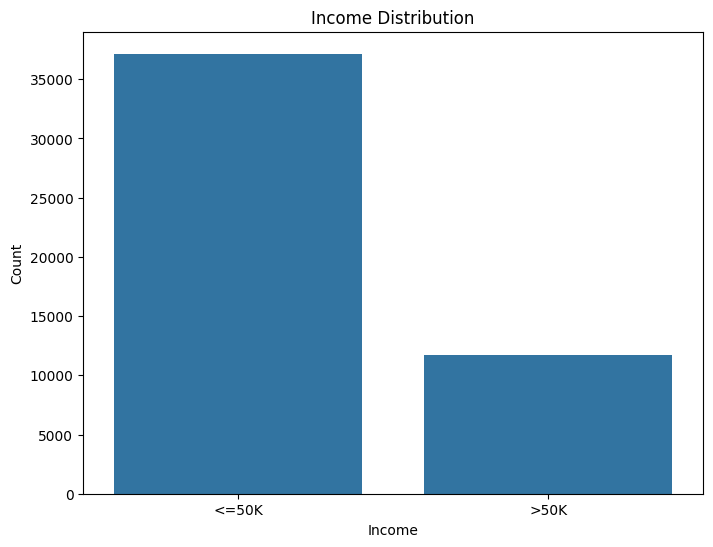

In [57]:
income_counts = df['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

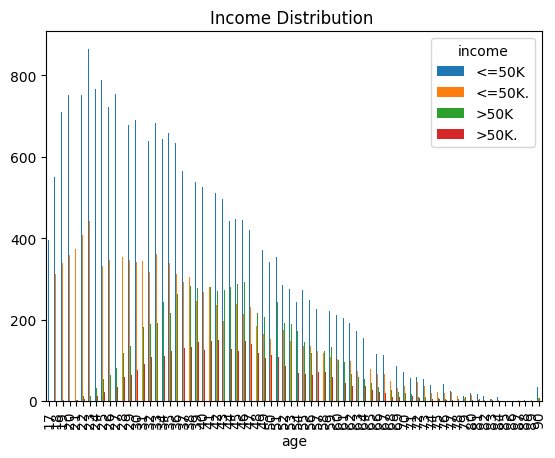

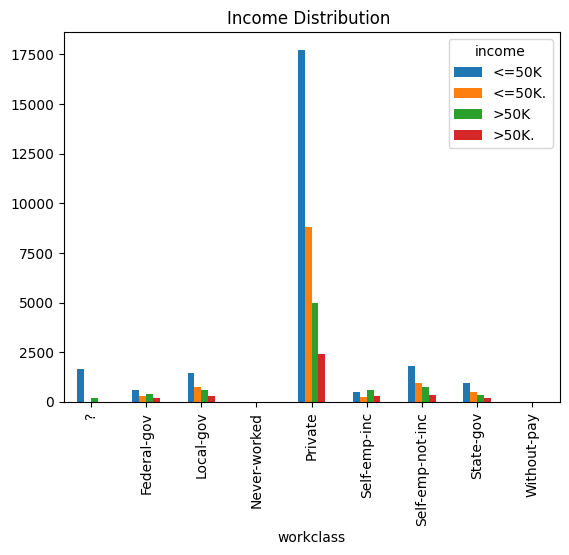

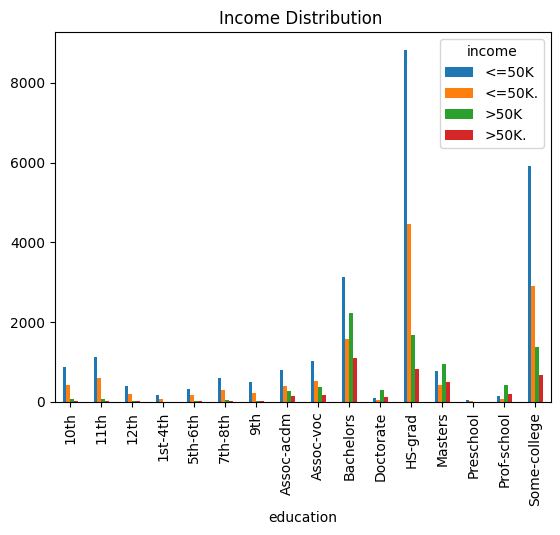

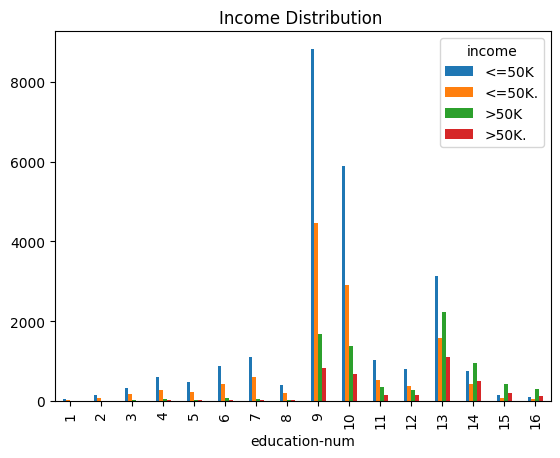

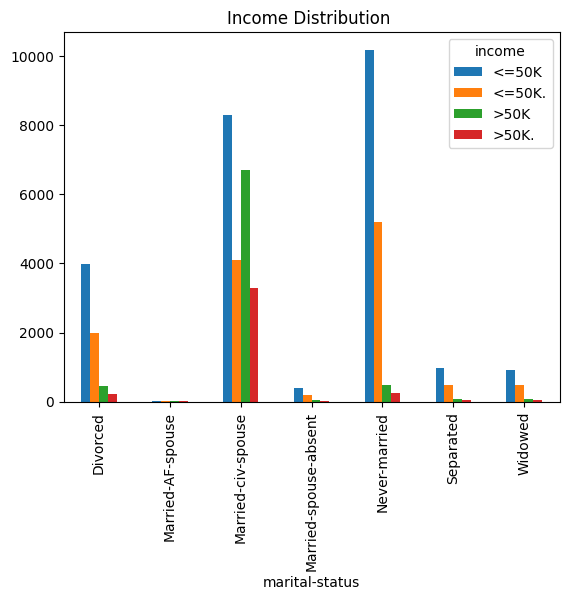

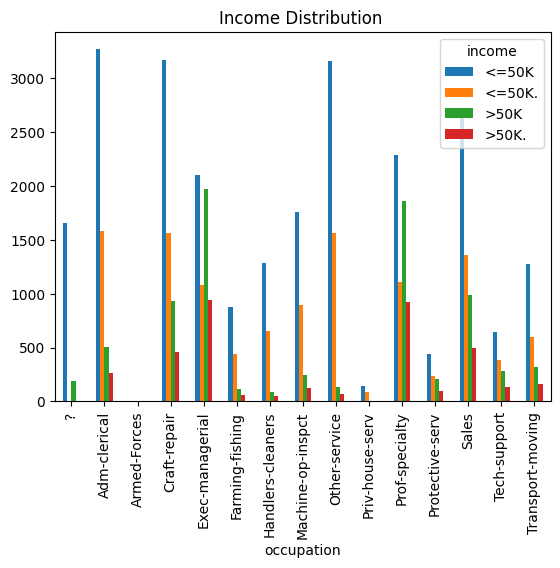

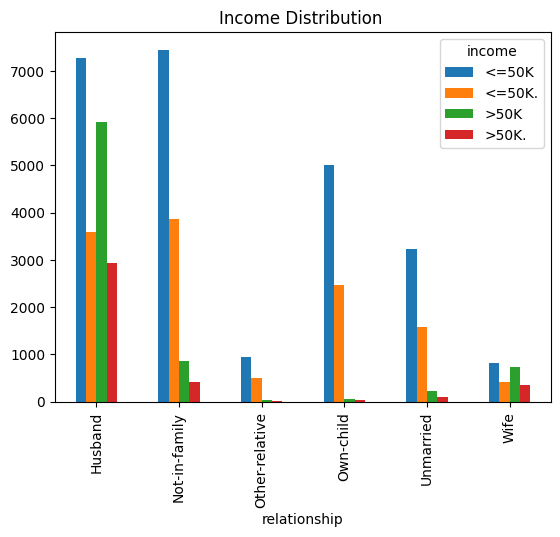

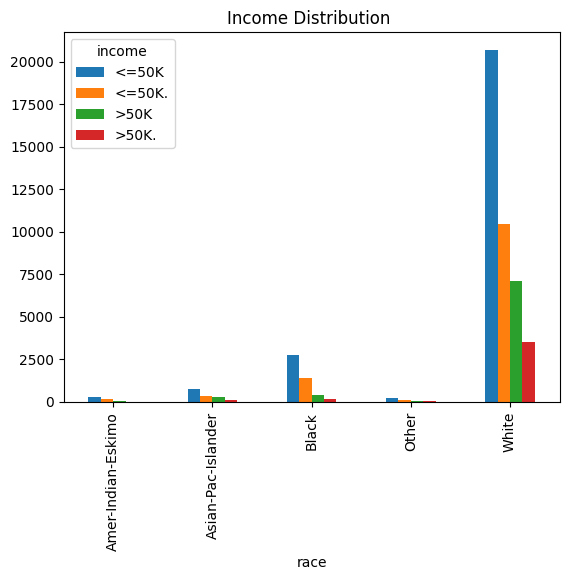

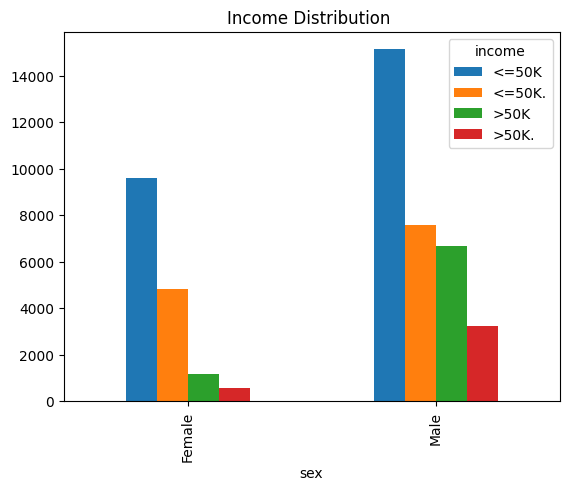

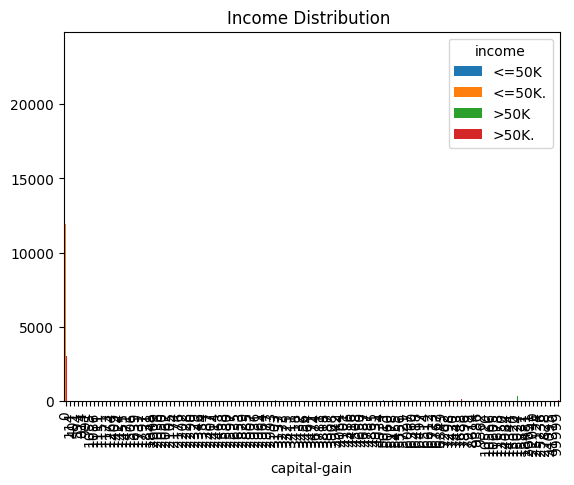

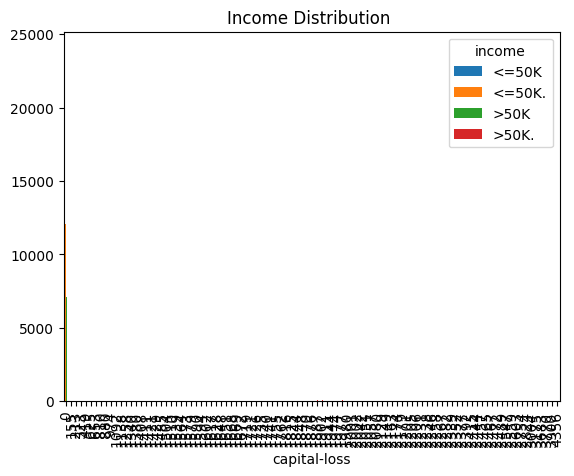

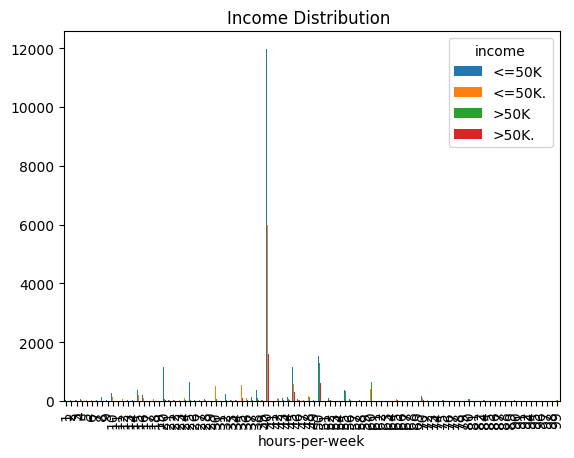

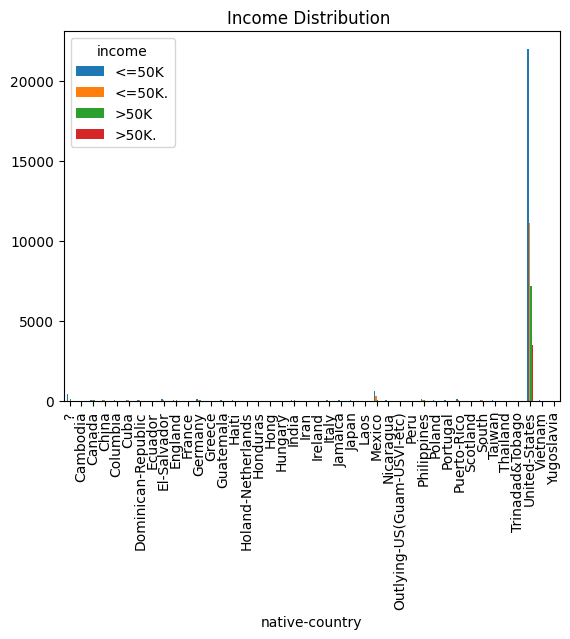

In [32]:
# Displaying plots of some features against income
features = ["age","workclass","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week" ,"native-country"]
for feature in features:
    pd.crosstab(df[feature], df['income']).plot(kind='bar')
    plt.title('Income Distribution ')
    plt.xticks(rotation= 90)
    plt.show()

**Data Preprocessing**

In [33]:
#Replacing unnecessary values in income column with correct ones
df['income'].replace('<=50K.','<=50K',inplace= True)
df['income'].replace('>50K.','>50K',inplace= True)

df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Replacing '?' values with NaN

In [34]:
df.replace('?', np.NaN, inplace=True)


In [35]:
df.eq("?").sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [36]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

handling null values with forward filling

In [37]:
df_processed = df.fillna(method='ffill')

In [38]:
df_processed.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [39]:
print(df_processed.duplicated().sum())

50


In [40]:
df_processed.shape

(48842, 15)

In [41]:
df_processed= df_processed.drop_duplicates()

In [42]:
df_processed.shape

(48792, 15)

**Checking for Outliers**

In [43]:
numerical_features = ['age','fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ]

def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers[col] = outlier_indices
    return outliers

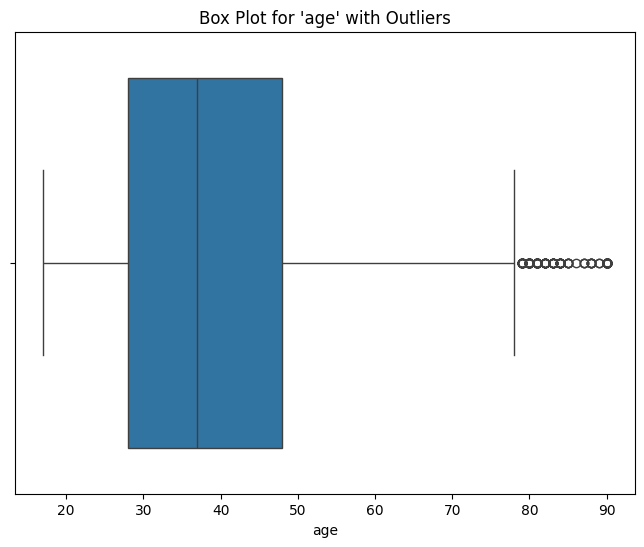

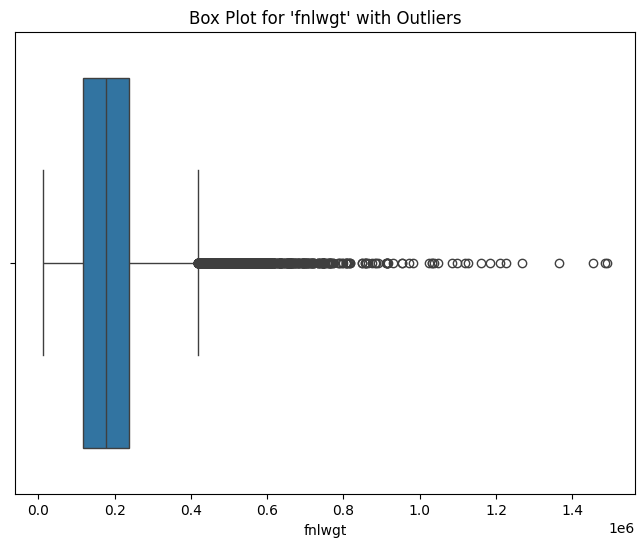

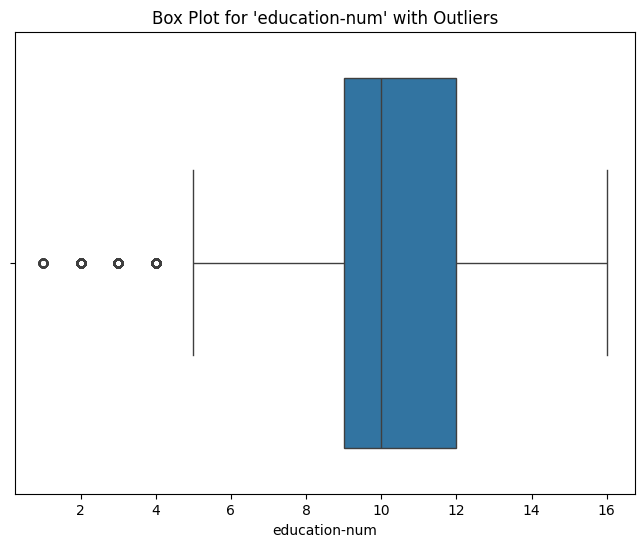

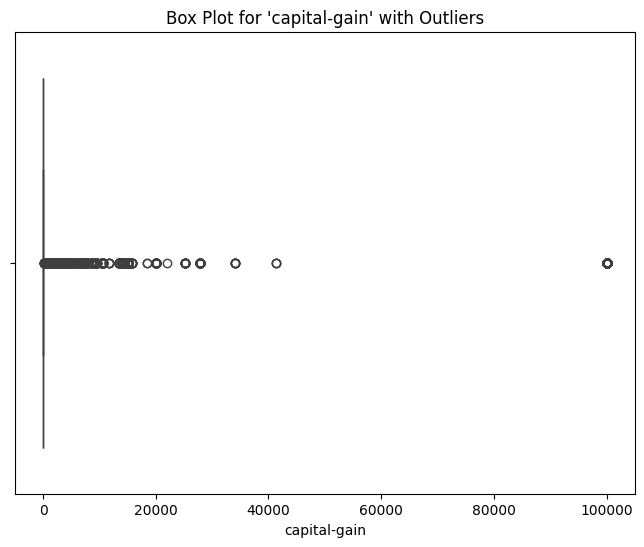

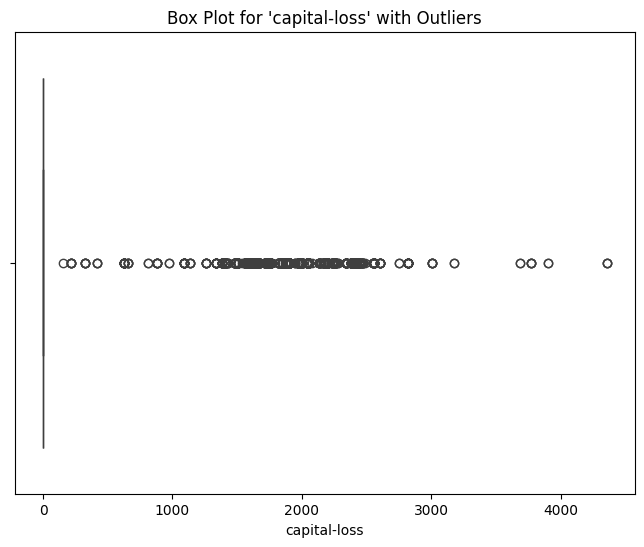

In [44]:
outlier_indices = detect_outliers_iqr(df_processed, numerical_features)

# Visualize outliers using box plots
for col, indices in outlier_indices.items():
    if len(indices) > 0:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_processed[col])
        plt.title("Box Plot for '{}' with Outliers".format(col))
        plt.show()

In [45]:
# #removing outliers of age
# def remove_outliers(data):
#     Q1_age = np.percentile(data['age'], 25)
#     Q3_age = np.percentile(data['age'], 75)
#     IQR_age = Q3_age - Q1_age
#     lower_bound_age = Q1_age - 1.5 * IQR_age
#     upper_bound_age = Q3_age + 1.5 * IQR_age
#     return data[(data['age'] >= lower_bound_age) & (data['age'] <= upper_bound_age)]

# # Remove outliers from 'age' column
# df_out = remove_outliers(df_processed)

# # Check the shape of the dataframe before and after removing outliers
# print("Shape of original dataframe:", df.shape)
# print("Shape of dataframe after removing outliers from 'age' column:", df_out.shape)

Shape of original dataframe: (48842, 15)
Shape of dataframe after removing outliers from 'age' column: (48626, 15)


In [46]:
#removing outliers of age
def remove_outliers(data):
    Q1_age = np.percentile(data['age'], 25)
    Q3_age = np.percentile(data['age'], 75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    return data[(data['age'] >= lower_bound_age) & (data['age'] <= upper_bound_age)]

# Remove outliers from 'age' column
df_out1 = remove_outliers(df_processed)

# Check the shape of the dataframe before and after removing outliers
print("Shape of original dataframe:", df_processed.shape)
print("Shape of dataframe after removing outliers from 'age' column:", df_out1.shape)

Shape of original dataframe: (48792, 15)
Shape of dataframe after removing outliers from 'age' column: (48577, 15)


In [ ]:
df_new.shape

(48792, 15)

In [ ]:
df_out1.shape

(48577, 15)

In [47]:
#removing outliers of education num
def remove_outliers(data):
    Q1_age = np.percentile(data['education-num'], 25)
    Q3_age = np.percentile(data['education-num'], 75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    return data[(data['education-num'] >= lower_bound_age) & (data['education-num'] <= upper_bound_age)]

# Remove outliers from 'education-num' column
df_out2 = remove_outliers(df_out1)

# Check the shape of the dataframe before and after removing outliers
print("Shape of original dataframe:", df_out1.shape)
print("Shape of dataframe after removing outliers from 'education-num' column:", df_out2.shape)

Shape of original dataframe: (48577, 15)
Shape of dataframe after removing outliers from 'education-num' column: (46830, 15)


In [48]:
df_out2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
df_processed= df_out2

In [50]:
df_processed.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
#removing Final-wgt column
df_processed=df_processed.drop(['fnlwgt'], axis = 1)
df_processed.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


grouping Values

In [52]:
#work classinto 3 groups
df_processed['workclass'] = df_processed['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Goverment')
df_processed['workclass'] = df_processed['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'], 'Self-Employed')
df_processed['workclass'] = df_processed['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')



In [54]:
#marital into two groups
df_processed['marital-status'] = df_processed['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Separated', 'Married-spouse-absent'], 'Married')
df_processed['marital-status'] = df_processed['marital-status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Un-Married')




In [53]:
#occupation into four groups
df_processed['occupation'] = df_processed['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'Professional')
df_processed['occupation'] = df_processed['occupation'].replace(['Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Tech-support'], 'Service')
df_processed['occupation'] = df_processed['occupation'].replace(['Sales', 'Craft-repair'], 'Sales')
df_processed['occupation'] = df_processed['occupation'].replace(['Other-service', 'Armed-Forces', 'Priv-house-serv'], 'Other')

In [55]:
df_processed.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Goverment,Bachelors,13,Un-Married,Service,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,Bachelors,13,Married,Professional,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Un-Married,Service,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married,Service,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# columns_to_fill = ['workclass', 'occupation', 'native-country']

# for column in columns_to_fill:
#     df[column].fillna('Unknown', inplace=True)

Label encoding

In [59]:
le = LabelEncoder()
df_processed['workclass'] = le.fit_transform(df_processed['workclass'])
df_processed['education'] = le.fit_transform(df_processed['education'])
df_processed['marital-status'] = le.fit_transform(df_processed['marital-status'])
df_processed['occupation'] = le.fit_transform(df_processed['occupation'])
df_processed['relationship'] = le.fit_transform(df_processed['relationship'])
df_processed['race'] = le.fit_transform(df_processed['race'])
df_processed['sex'] = le.fit_transform(df_processed['sex'])
df_processed['hours-per-week'] = le.fit_transform(df_processed['hours-per-week'])
df_processed['native-country'] = le.fit_transform(df_processed['native-country'])
df_processed['income'] = le.fit_transform(df_processed['income'])


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [60]:
df_processed.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,6,13,1,3,1,4,1,2174,0,39,38,0
1,50,2,6,13,0,1,0,4,1,0,0,12,38,0
2,38,1,8,9,1,3,1,4,1,0,0,39,38,0
3,53,1,1,7,0,3,0,2,1,0,0,39,38,0
4,28,1,6,13,0,1,5,2,0,0,0,39,4,0


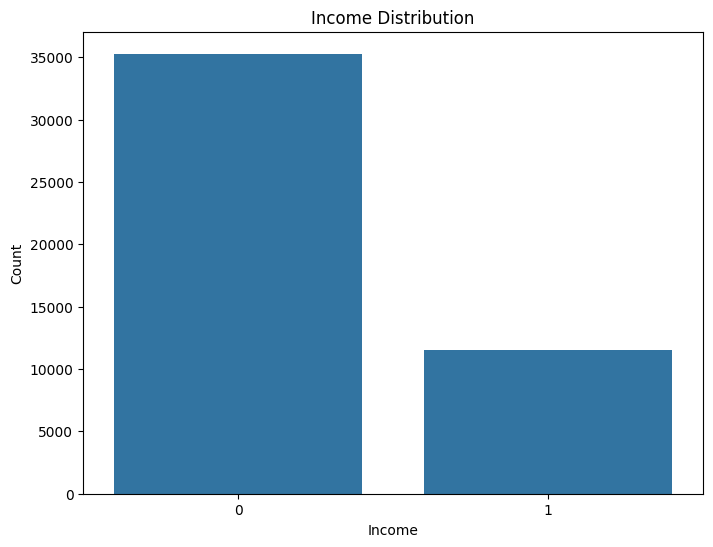

In [61]:
income_counts = df_processed['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

handling class imabalance

In [64]:
# Create X and y variables
Y = df_processed['income']
X = df_processed.drop('income', axis=1)
# Initialize the RandomOverSampler
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Create a new balanced DataFrame
df_new = pd.concat([X_resampled, y_resampled], axis=1)

# Now, 'balanced_df' contains the balanced dataset

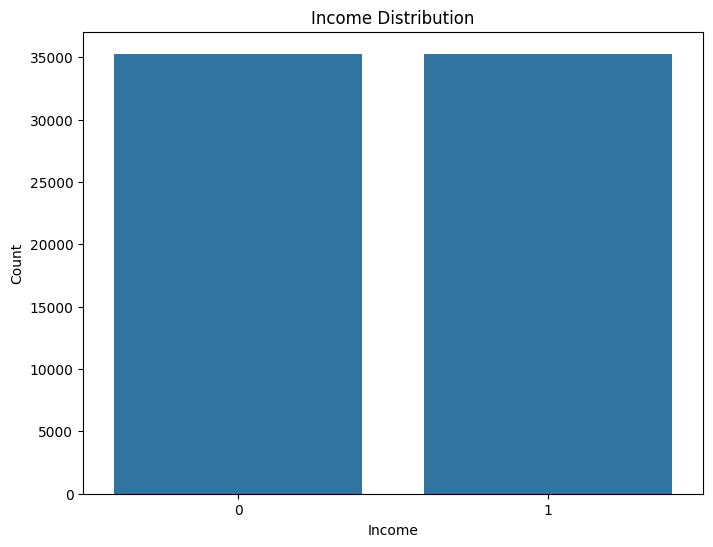

In [66]:
income_counts = df_new['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [67]:
df_new.shape

(70570, 14)

In [68]:
df_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,6,13,1,3,1,4,1,2174,0,39,38,0
1,50,2,6,13,0,1,0,4,1,0,0,12,38,0
2,38,1,8,9,1,3,1,4,1,0,0,39,38,0
3,53,1,1,7,0,3,0,2,1,0,0,39,38,0
4,28,1,6,13,0,1,5,2,0,0,0,39,4,0


**Model Training Procedure**

In [69]:
x = df_new.drop(['income'], axis = 1)
y = df_new['income']

In [71]:
x.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,6,13,1,3,1,4,1,2174,0,39,38
1,50,2,6,13,0,1,0,4,1,0,0,12,38
2,38,1,8,9,1,3,1,4,1,0,0,39,38
3,53,1,1,7,0,3,0,2,1,0,0,39,38
4,28,1,6,13,0,1,5,2,0,0,0,39,4


In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Splitting into test and train sets

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Loading models

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

training Naive Bayes model

In [76]:
#training Naive Bayes model
gb = GaussianNB()
gb.fit(x_train,y_train)
prediction_nb = gb.predict(x_test)

In [77]:
print(classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76     10550
           1       0.88      0.49      0.63     10621

    accuracy                           0.71     21171
   macro avg       0.76      0.71      0.69     21171
weighted avg       0.76      0.71      0.69     21171



In [78]:
print(confusion_matrix(y_test,prediction_nb))

[[9806  744]
 [5411 5210]]


In [79]:
print(accuracy_score(y_test,prediction_nb)*100)

70.9272117519248


In [80]:
print("Acc on training data: {:,.3f}".format(gb.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(gb.score(x_test, y_test)))

Acc on training data: 0.709
Acc on test data: 0.709


training Random Forrest model

In [82]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)

rfc.fit(x_train, y_train)
prediction_rfc = rfc.predict(x_test)

print("Acc on training data: {:,.3f}".format(rfc.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(x_test, y_test)))

Acc on training data: 0.956
Acc on test data: 0.871


In [83]:
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     10550
           1       0.86      0.89      0.87     10621

    accuracy                           0.87     21171
   macro avg       0.87      0.87      0.87     21171
weighted avg       0.87      0.87      0.87     21171



In [84]:
print(confusion_matrix(y_test, prediction_rfc))

[[8945 1605]
 [1128 9493]]


In [85]:
print(accuracy_score(y_test,prediction_rfc)*100)

87.09083179821454
